<h1 align=center><font size=5>Predicting Max Temp in a day given Min Temp. </font></h1>

Weather Conditions in World War Two: Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [1]:
#Needed libraries and modules
import pandas as pd                                  # data processing
import numpy as np                                   # linear algebra functionalities 
import seaborn as sns                                # visualization library
import matplotlib.pyplot as plt                      # visualization library

#Modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import multiprocessing
import warnings
warnings.filterwarnings("ignore")


### Table of Contents

* [Loading and visualizing the data](#Section1)
* [Linear regression](#Section2)
* [Polynomial regression](#Section3)
* [Conclusion. Model comparison](#Section4)


<h1>1. Loading and visualizing the data <a class="anchor" id="Section1"></a>



In [2]:
path = "Summary_of_Weather.csv"
df = pd.read_csv(path)
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Reshape to covert from numpy 1 array to numpy 2D array which is what we need to work with.

X = df['MinTemp'].values.reshape(-1,1)         #X contains the observations of the independent variable
Y = df['MaxTemp'].values.reshape(-1,1)         #Y contains the observations of the dependent variable
 
print("Type and size of the  vector X:", type(X), X.shape)
print("Type and size of the  vector Y:", type(Y), Y.shape)

Type and size of the  vector X: <class 'numpy.ndarray'> (119040, 1)
Type and size of the  vector Y: <class 'numpy.ndarray'> (119040, 1)


Text(0, 0.5, 'MaxTemp')

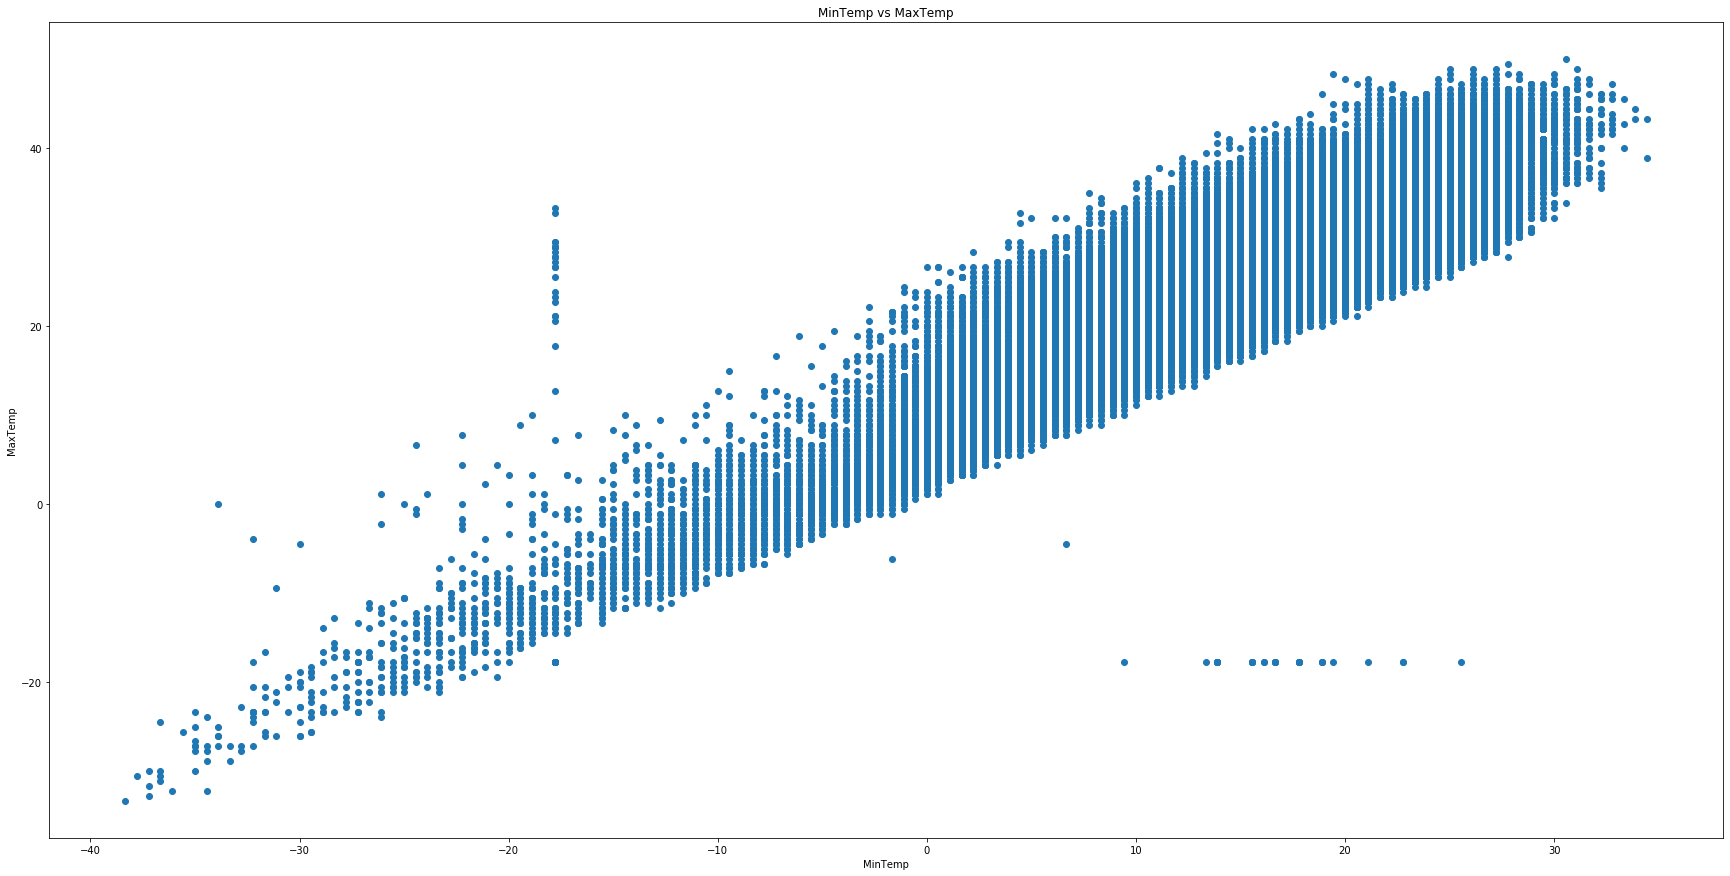

In [4]:
#Scatter plot of the data

width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  

Text(0, 0.5, 'Density of observations')

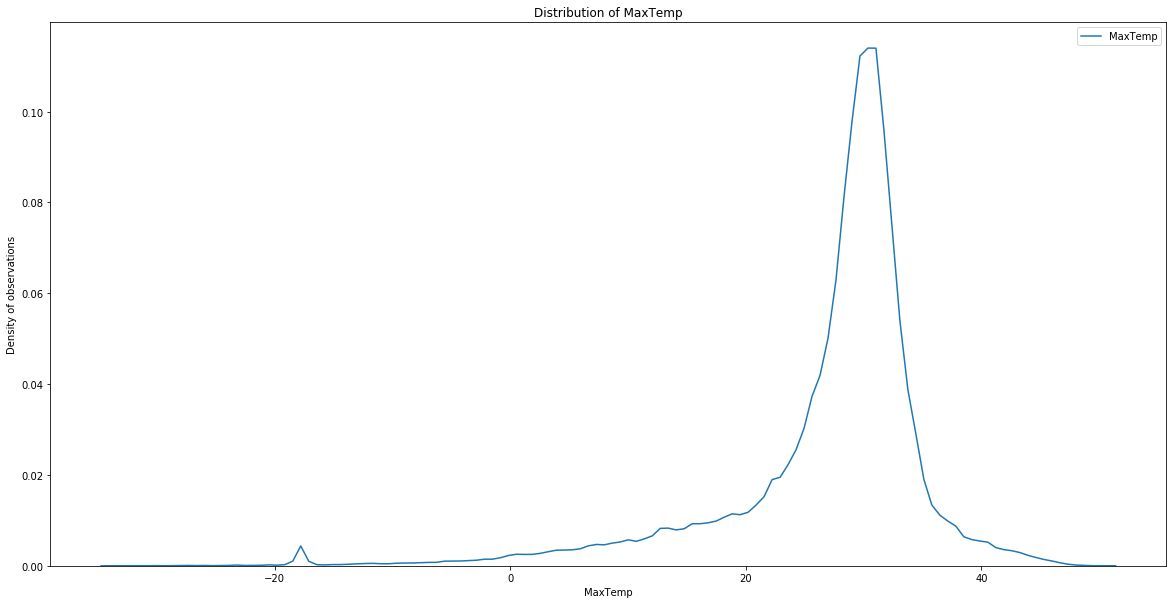

In [5]:
#Distribution plot of MaxTemp

width = 20
height = 10
plt.figure(figsize=(width, height))
sns.distplot(Y, hist=False, label="MaxTemp")

plt.title('Distribution of MaxTemp')  
plt.xlabel('MaxTemp')
plt.ylabel('Density of observations')

In [6]:
#Spliting the data into train (80%) and test (20%) sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Amount of elements in the train set:', X_train.size)
print('Amount of elements in the test set:', Y_test.size)
print("Shape of train and test vectors", Y_train.shape, X_test.shape)

Amount of elements in the train set: 95232
Amount of elements in the test set: 23808
Shape of train and test vectors (95232, 1) (23808, 1)


<h1>2. Linear regression <a class="anchor" id="Section2"></a>

In [7]:
#Training linear model

lm = LinearRegression()

lm.fit(X_train,Y_train)

print('The learned intercept and coefficients are', lm.intercept_, lm.coef_) 

The learned intercept and coefficients are [10.66379122] [[0.92074426]]


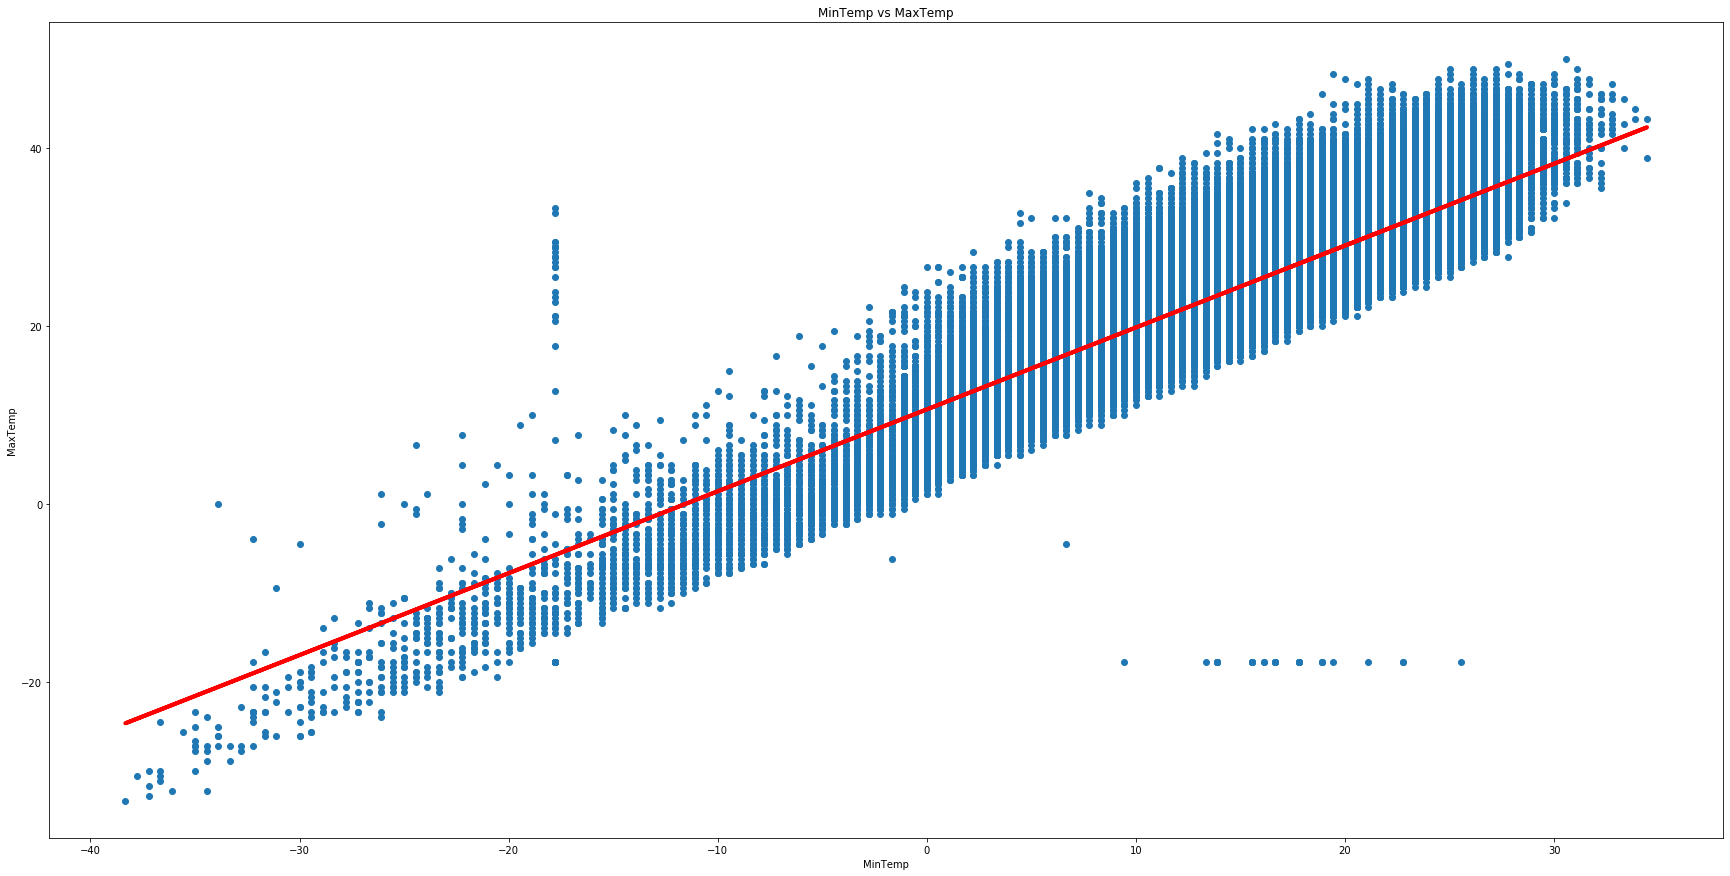

In [8]:
#Making predictions using the entire data set and plotting 

Yhat = lm.predict(X)

width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.plot(X, Yhat, color='red', linewidth=4)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')
plt.show()

Let us see how our model performs on new data.

In [9]:
print('Acuracy of simple linear regression on the test set:', lm.score(X_test, Y_test))

Yhat_test = lm.predict(X_test)
print('Mean squared error of simple linear regression on the test set:', mean_squared_error(Y_test, Yhat_test))

Acuracy of simple linear regression on the test set: 0.763970343378441
Mean squared error of simple linear regression on the test set: 17.611507940032382


Let's compare the distribution of the predicted max temperatures  with the actual one.

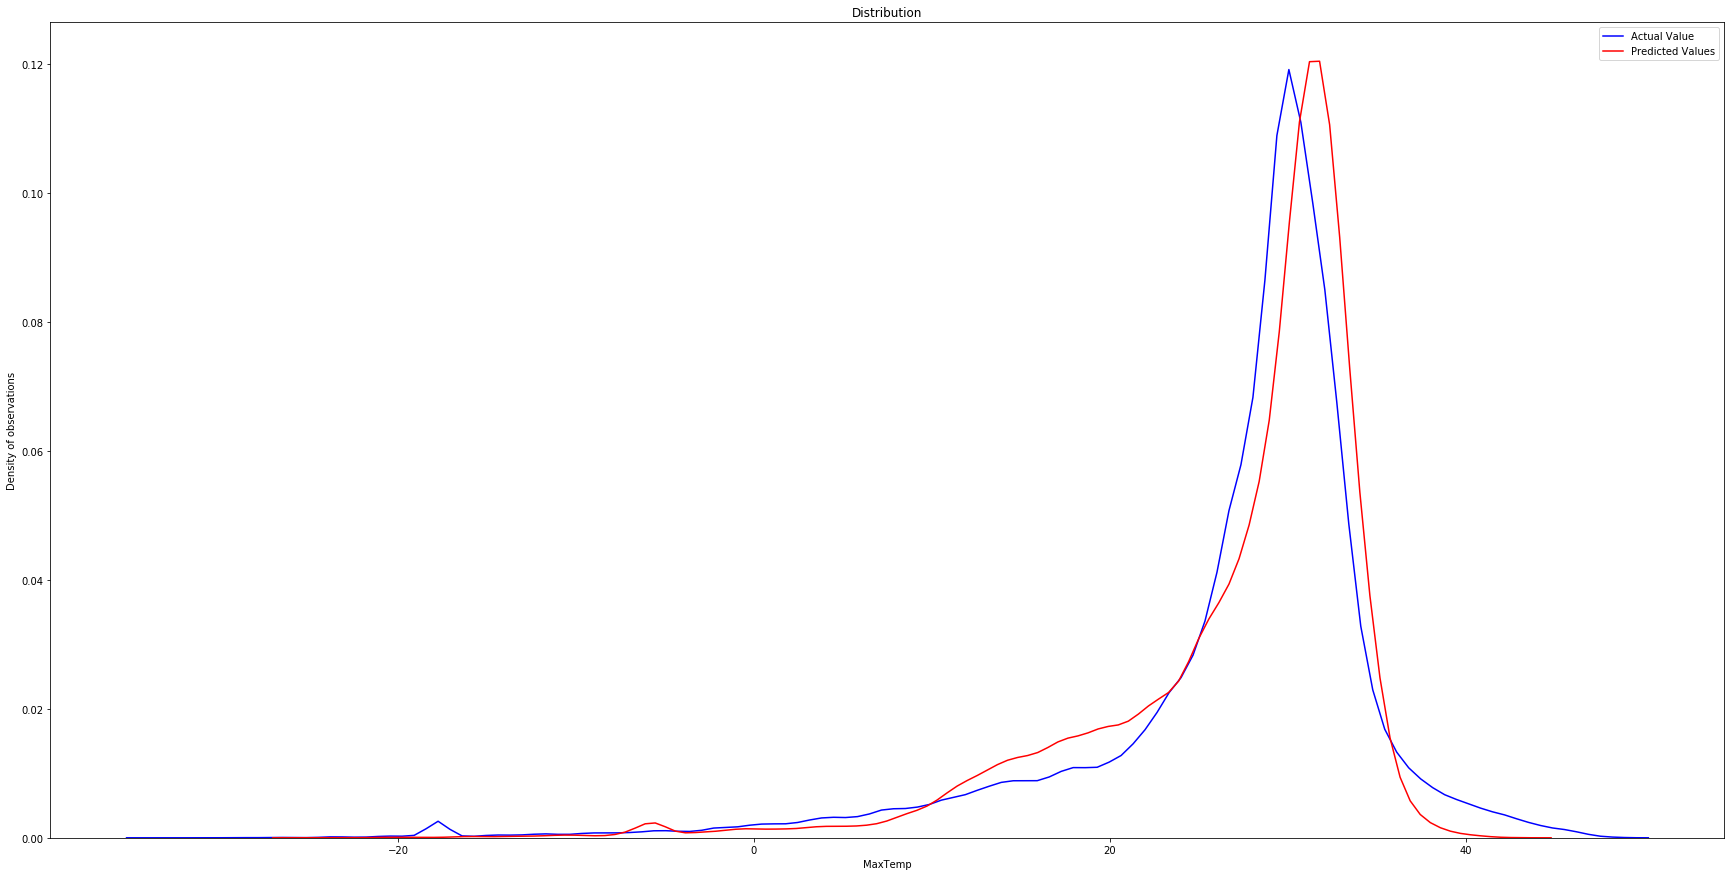

In [10]:
width = 30
height = 15
plt.figure(figsize=(width, height))

#Ploting the actual and predicted distributions
ax1 = sns.distplot(Y_test, hist=False, color="b", label="Actual Value")
sns.distplot(Yhat_test, hist=False, color="r", label="Predicted Values" , ax=ax1)

plt.title('Distribution')  
plt.xlabel('MaxTemp')
plt.ylabel('Density of observations')

plt.show()
plt.close()

This looks pretty accurate. Let's check if there is another model that fits better the data.

<h1>3. Polynomial regression <a class="anchor" id="Section3"></a>

In this section, we look for the best polynomial model that fits our data. To that end we will use a Ridge model which considers a regularization parameter proportional to the L2 norm. See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

For each degree d=1, ..., n, we do a grid search along the  regularization parameters alpha. This yields:

- A best estimator for each degree, i.e. the best parameters alpha.
- associated rˆ2 and mean squared error (mse) scores for each of these best estimators 



In [11]:
CV_param_grid = [{'alpha': [0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4] }]

CV_best_estimators = []
CV_best_r2_scores = []
CV_best_mse_scores = []
CV_best_params = []

random_state = 47

degrees = 20
for d in range(degrees):
    pf = PolynomialFeatures(degree=d+1)
    Xd = pf.fit_transform(X_train)
    
    #The grid serch computes both, the r^2 and the negative mse, but it selects the best model based on the r^2 score.
    Grid = GridSearchCV(estimator= Ridge(random_state = random_state), param_grid=CV_param_grid, scoring=['r2','neg_mean_squared_error'], 
                        cv=20, refit='r2', n_jobs=multiprocessing.cpu_count())
    Grid.fit(Xd, Y_train)
    CV_best_estimators.append(Grid.best_estimator_)
    CV_best_r2_scores.append(Grid.best_score_)
    CV_best_mse_scores.append((-1)*Grid.cv_results_['mean_test_neg_mean_squared_error'][Grid.best_index_])
    CV_best_params.append(Grid.best_params_)


In [12]:
print('The list of best parameters for each degree is:\n', CV_best_params)
print('The list of best CV r^2 scores for each degree is:\n', CV_best_r2_scores)
print('The list of best CV mse scores for each degree is:\n', CV_best_mse_scores)

The list of best parameters for each degree is:
 [{'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 0.1}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 6.4}, {'alpha': 0.1}, {'alpha': 0.2}]
The list of best CV r^2 scores for each degree is:
 [0.7732992066465012, 0.7916954701036119, 0.7966450572691894, 0.7979979491291401, 0.8033545941070516, 0.8047818597009069, 0.8050604737068277, 0.8051993347516835, 0.8054364390593133, 0.8055351738624219, 0.8061506072285299, 0.806121989851287, 0.8066340794317929, 0.8066955558604378, 0.8066810702226906, 0.8068213796341954, 0.8066625323321046, 0.8072874703910691, 0.807262089613322, 0.8071731604945607]
The list of best CV mse scores for each degree is:
 [17.300315230993498, 15.899308067806302, 15.52048680872763, 15.418679787211053, 15.00953884197869, 14.900210309964418, 14.87890

Let's see how good these models perform in the test set

In [13]:
test_r2_scores = []
test_mse_scores = []


for d in range(degrees):
    pf = PolynomialFeatures(degree=d+1)
    Xd_test = pf.fit_transform(X_test)
    Ydhat = CV_best_estimators[d].predict(Xd_test)
    test_r2_scores.append(r2_score(Ydhat, Y_test))
    test_mse_scores.append(mean_squared_error(Ydhat, Y_test))

In [14]:
print('The list of r^2 scores in the test set for each degree is:\n', test_r2_scores)
print('The list of mse scores in the test set for each degree is:\n', test_mse_scores)

The list of r^2 scores in the test set for each degree is:
 [0.6977334177561997, 0.7282821498051402, 0.7356497814154368, 0.7390292008563875, 0.7454179582334601, 0.7478943512282408, 0.748343613625489, 0.7486537246417979, 0.7491447970597587, 0.7498313569506909, 0.7489991257017554, 0.7494767975615723, 0.7504040933071068, 0.7505378822582062, 0.7506006620742279, 0.7487511338611437, 0.7488662496679552, 0.7512688252278745, 0.751270250341912, 0.7512524971452024]
The list of mse scores in the test set for each degree is:
 [17.611506724456788, 16.170810265327514, 15.835617859384975, 15.703332691058607, 15.334302135488016, 15.229632297070928, 15.223702803985276, 15.203228690759326, 15.172925401036233, 15.144120796188222, 15.132974957810587, 15.117883657986024, 15.101851000723505, 15.081084214061105, 15.08496899629193, 15.129078415092149, 15.123608427121859, 15.048500000475372, 15.048049751821345, 15.070103208761314]


Let's plot the r^2 and mse scores per degree

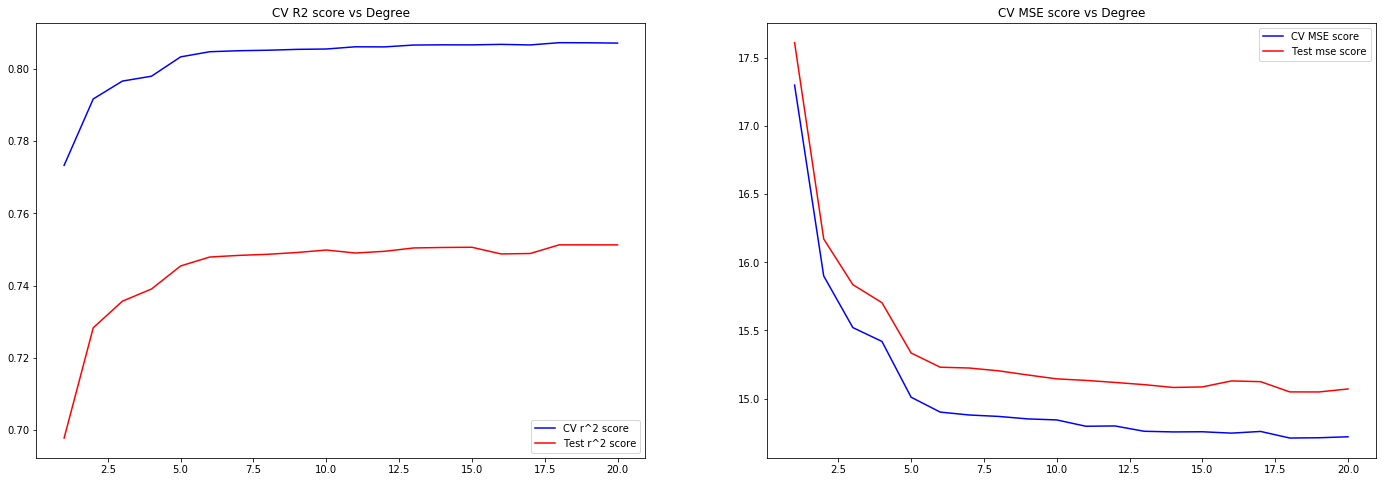

In [15]:
width = 24
height = 8
plt.figure(figsize=(width, height))

plt.subplot(1, 2, 1)
plt.plot(range(1,degrees+1), CV_best_r2_scores, color='blue', label="CV r^2 score")
plt.plot(range(1,degrees+1), test_r2_scores, color='red', label="Test r^2 score")
plt.legend(loc="lower right")
plt.title('CV R2 score vs Degree') 

plt.subplot(1, 2, 2)
plt.plot(range(1,degrees+1), CV_best_mse_scores, color='blue', label="CV mse score")
plt.plot(range(1,degrees+1), test_mse_scores, color='red', label="Test mse score")
plt.legend(loc="top right")
plt.title('CV MSE score vs Degree') 

plt.show()


In [16]:
#Conclussion
best_d_r2_cv = CV_best_r2_scores.index(max(CV_best_r2_scores))+1
best_d_mse_cv = CV_best_mse_scores.index(min(CV_best_mse_scores))+1

print("Degree with best CV R^2 score:", best_d_r2_cv)
print("Degree with best CV MSE score:", best_d_mse_cv)

Degree with best CV R^2 score: 18
Degree with best CV MSE score: 18


In [17]:
print('The best hyperparameters found after CV are:\n', 'degree:', best_d_r2_cv, '\n',  
      'alpha:', CV_best_params[best_d_r2_cv-1]['alpha'],
     )

The best hyperparameters found after CV are:
 degree: 18 
 alpha: 6.4


In [18]:
BestModel = CV_best_estimators[best_d_r2_cv-1]
BestModel

Ridge(alpha=6.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=47, solver='auto', tol=0.001)

Lets plot the curve of our trained model together with data set 

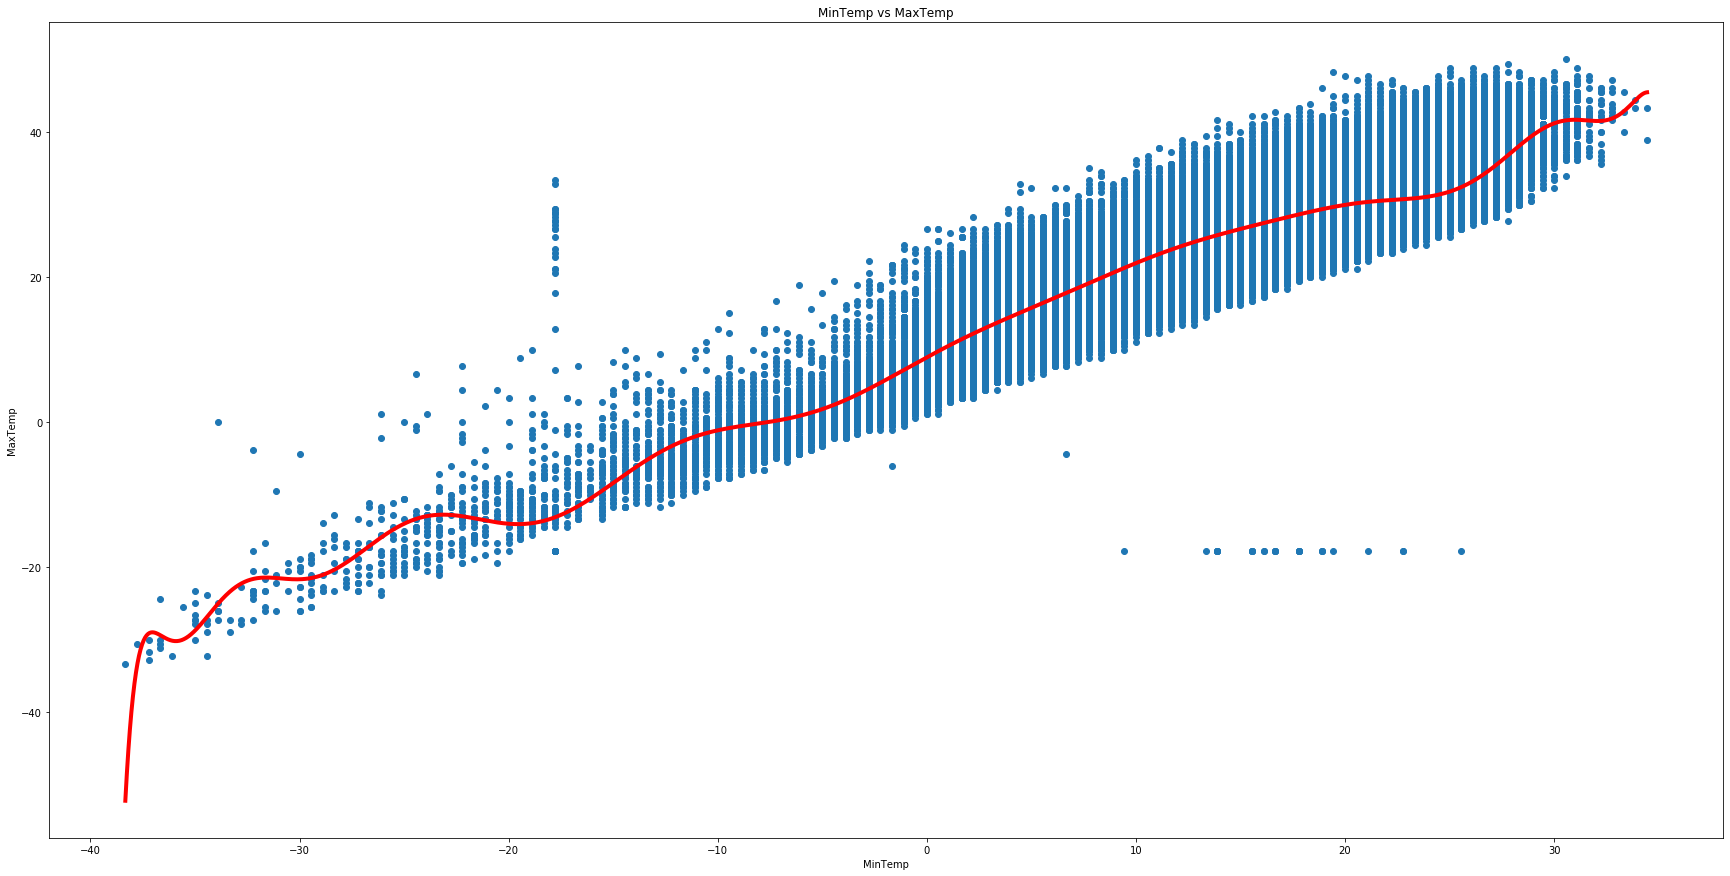

In [19]:
X_new = np.linspace(min(X), max(X), 2000).reshape(2000,1)
pf = PolynomialFeatures(degree= best_d_r2_cv)
X_trans = pf.fit_transform(X_new)
Yhat_trans = BestModel.predict(X_trans)

#Plotting predictions
width = 30
height = 15
plt.figure(figsize=(width, height))

plt.scatter(X,Y)
plt.plot(X_new, Yhat_trans, color='red', linewidth=4)
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')
plt.show()

Let's see how the above polynomial regression model performs in the test set.

In [20]:
pf = PolynomialFeatures(degree= best_d_r2_cv)
Xd_test = pf.fit_transform(X_test)
Ydhat_test = BestModel.predict(Xd_test)

print('Acuracy of the above polynomial regression on the test set:', BestModel.score(Xd_test, Y_test))

print('Mean squared error of the above polynomial regression on the test set:', mean_squared_error(Y_test, Ydhat_test))

Acuracy of the above polynomial regression on the test set: 0.7983198088502123
Mean squared error of the above polynomial regression on the test set: 15.048500000475372


<h1>4. Conclusion. Model comparison <a class="anchor" id="Section4"></a>

The polynomial model yields beter r^2 and mse errors than the linear regression model (around 0.76 and 17.6 respectively). 

However, in certain regions the variance seems to be very high, espacially at the lower extreme values. Let's compare de performance of the polynomial and the linear model in this region.

In [21]:
def PerformaceLimitCases (Model, X, Y, lim_inf, lim_sup, degree=1):
    """
    This function returs the r^2 scores of a model in the interval  lim_inf < X < lim_sup
    """
    if degree == 1:
        return Model.score(X[(X > lim_inf) & (X < lim_sup)].reshape(-1,1), Y[(X > lim_inf) & (X < lim_sup)].reshape(-1,1))
    else:
        pf = PolynomialFeatures(degree= degree)
        Xt = pf.fit_transform(X[(X > lim_inf) & (X < lim_sup)].reshape(-1,1))
        return Model.score(Xt, Y[(X > lim_inf) & (X < lim_sup)].reshape(-1,1))

In [22]:
print('Perfomance of the BestModel in the range (-34, -30):', 
      PerformaceLimitCases(BestModel, X_test, Y_test, -34, -30, best_d_r2_cv))
print('Perfomance of the linear model outside of the range (-34, -30):', 
      PerformaceLimitCases(lm, X_test, Y_test, -34, -30, 1))


Perfomance of the BestModel in the range (-34, -30): -0.21234721704500267
Perfomance of the linear model outside of the range (-34, -30): -0.005672485335207922


We see that in the interval (-34, -30) the linear model performs better. 

Let's also check the predicted  distribution of the polnomial model. 

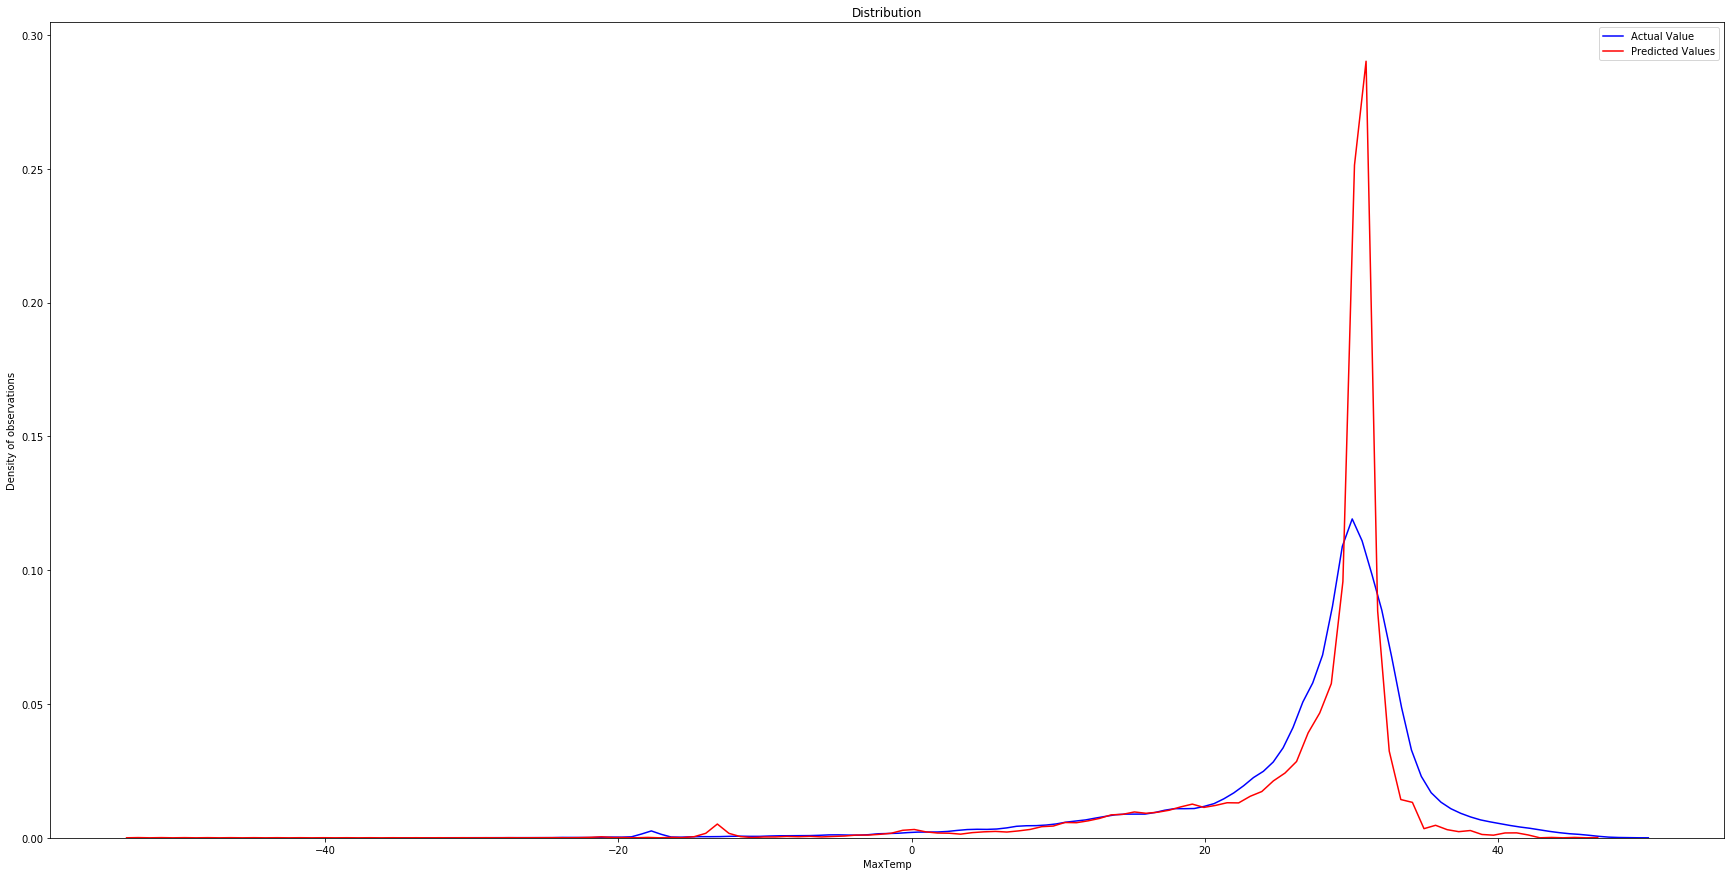

In [23]:
width = 30
height = 15
plt.figure(figsize=(width, height))

#Ploting the actual and predicted distributions
ax1 = sns.distplot(Y_test, hist=False, color="b", label="Actual Value")
sns.distplot(Ydhat_test, hist=False, color="r", label="Predicted Values" , ax=ax1)

plt.title('Distribution')  
plt.xlabel('MaxTemp')
plt.ylabel('Density of observations')

plt.show()
plt.close()

We see that the linear model seems to provide a more accurate distribution, especially in values around 30 degrees. 
Moreover, the improvements in the r^2 and mse scores are not vere significative (from 0.76 to 0.79 and from 17 to 15). Therefore, it seems reasonable to keep  the linear regression as a predictive model for this data set.